In [47]:
import cv2 as CV
import numpy as NP
import matplotlib.pyplot as PL

In [48]:
X1 = CV.imread("transA.jpg")
X2 = CV.imread("transB.jpg")

In [49]:
I1 = CV.cvtColor(X1,CV.COLOR_BGR2GRAY)
I2 = CV.cvtColor(X2,CV.COLOR_BGR2GRAY)

In [50]:
sift = CV.xfeatures2d.SIFT_create()

In [51]:
kp1,des1 = sift.detectAndCompute(I1,None)
kp2,des2 = sift.detectAndCompute(I2,None)


In [52]:
BF = CV.BFMatcher()
M = BF.knnMatch(des1,des2, k=2)

In [45]:
len(M)

1912

In [55]:
BEST_MATCH = []
BEST_MATCH_WITHOUT_LIST = [] #...here I have best match of kp1 
INDEX = 0
L_index = []
for m,n in M:
    if m.distance <= 0.80*n.distance:
        BEST_MATCH.append([m])
        BEST_MATCH_WITHOUT_LIST.append(m)
        L_index.append(INDEX)
    INDEX = INDEX +1
        


In [66]:
BEST_MATCH_WITHOUT_LIST[2].queryIdx

47

In [67]:
L_index

[13,
 46,
 47,
 48,
 58,
 61,
 62,
 63,
 64,
 80,
 81,
 83,
 85,
 86,
 96,
 100,
 107,
 108,
 109,
 113,
 114,
 117,
 123,
 126,
 132,
 133,
 134,
 135,
 137,
 138,
 140,
 145,
 148,
 149,
 150,
 158,
 160,
 166,
 173,
 180,
 181,
 182,
 186,
 187,
 188,
 189,
 196,
 200,
 201,
 205,
 206,
 208,
 212,
 213,
 220,
 223,
 224,
 227,
 233,
 234,
 235,
 239,
 242,
 248,
 260,
 263,
 267,
 269,
 272,
 273,
 274,
 284,
 285,
 288,
 290,
 291,
 293,
 305,
 306,
 309,
 310,
 323,
 326,
 336,
 343,
 355,
 356,
 357,
 358,
 365,
 366,
 367,
 368,
 371,
 374,
 375,
 376,
 377,
 383,
 386,
 388,
 389,
 393,
 394,
 395,
 396,
 400,
 405,
 406,
 407,
 408,
 411,
 415,
 421,
 422,
 431,
 444,
 452,
 454,
 469,
 473,
 482,
 488,
 502,
 510,
 515,
 517,
 520,
 526,
 528,
 530,
 540,
 542,
 543,
 545,
 546,
 561,
 562,
 563,
 566,
 567,
 568,
 571,
 574,
 575,
 579,
 582,
 586,
 590,
 595,
 600,
 601,
 605,
 606,
 607,
 612,
 614,
 618,
 625,
 626,
 628,
 631,
 650,
 651,
 658,
 659,
 662,
 663,
 670,
 

In [33]:
I4 = CV.drawMatches(I1, kp1, I2, kp2,BEST_MATCH_WITHOUT_LIST,2)

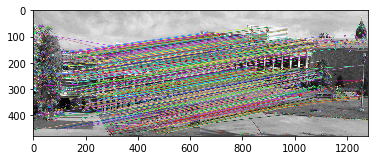

In [34]:
PL.imshow(I4)
#PL.axis('off')

In [35]:
points1 = NP.zeros((len(BEST_MATCH_WITHOUT_LIST), 2), dtype=NP.float32)
points2 = NP.zeros((len(BEST_MATCH_WITHOUT_LIST), 2), dtype=NP.float32)

In [36]:
for i, match in enumerate(BEST_MATCH_WITHOUT_LIST):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt


In [37]:
h, mask = CV.findHomography(points1, points2, CV.RANSAC,5.0)


In [39]:
h

array([[ 8.96768053e-01, -1.43647780e-04, -1.02087431e+02],
       [ 1.01316521e-04,  8.96582803e-01, -5.52258588e+01],
       [ 3.59479946e-07,  1.51449468e-08,  1.00000000e+00]])

In [13]:
height, width, channels = X1.shape

Text(0.5,1,'OUTPUT IMAGE')

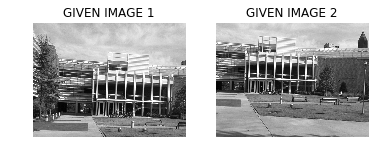

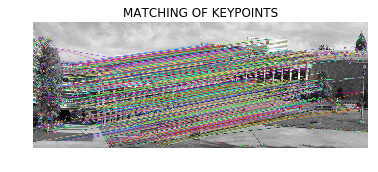

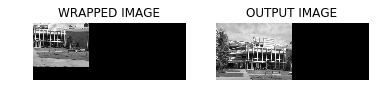

In [14]:
result1= CV.warpPerspective(X2,h, (X1.shape[1]+X2.shape[1],X2.shape[0]))
PL.figure(1)
PL.subplot(121)
PL.imshow(X1)
PL.axis('off')
PL.title('GIVEN IMAGE 1')

PL.subplot(122)
PL.imshow(X2)
PL.axis('off')
PL.title('GIVEN IMAGE 2')

PL.figure(2)
PL.imshow(I4)
PL.axis('off')
PL.title('MATCHING OF KEYPOINTS')

PL.figure(3)
PL.subplot(121)
PL.imshow(result1)
PL.axis('off')
PL.title('WRAPPED IMAGE')
result1[0:X1.shape[0], 0:X1.shape[1]] = X1
PL.subplot(122)
PL.imshow(result1)
PL.axis('off')
PL.title('OUTPUT IMAGE')
